In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `df`.

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

df = pd.read_csv('Movie+Assignment+Data.csv')
df.head(3)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Check the number of rows and columns in the dataframe

df.shape

(100, 62)

In [5]:
# Check the column-wise info of the dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
Title                     100 non-null object
title_year                100 non-null int64
budget                    100 non-null int64
Gross                     100 non-null int64
actor_1_name              100 non-null object
actor_2_name              100 non-null object
actor_3_name              100 non-null object
actor_1_facebook_likes    100 non-null int64
actor_2_facebook_likes    99 non-null float64
actor_3_facebook_likes    98 non-null float64
IMDb_rating               100 non-null float64
genre_1                   100 non-null object
genre_2                   97 non-null object
genre_3                   74 non-null object
MetaCritic                95 non-null float64
Runtime                   100 non-null int64
CVotes10                  100 non-null int64
CVotes09                  100 non-null int64
CVotes08                  100 non-null int64
CVotes07                  100 n

In [6]:
# Check the summary for the numeric columns 

df.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [7]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

df['budget'] = df['budget']//1000000
df['Gross'] = df['Gross']//1000000
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30,151,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12,51,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47,100,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9,47,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [8]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

df['Profit'] = df['Gross']-df['budget']
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
0,La La Land,2016,30,151,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191
2,Lion,2016,12,51,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39
3,Arrival,2016,47,100,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53
4,Manchester by the Sea,2016,9,47,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38


In [9]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

df = df.sort_values(by = 'Profit', ascending=False)
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214


In [10]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

top_10 = df.sort_values(by = 'Profit', ascending=False).head(10)
top_10

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214
8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198
45,The Lego Movie,2014,60,257,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191
41,Despicable Me,2010,69,251,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182
18,Inside Out,2015,175,356,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181


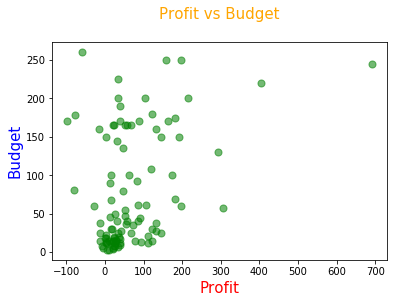

In [11]:
#Plot profit vs budget

#plt.scatter(data=df, x='Profit', y='budget', alpha=0.5, c='red', s=50)
plt.scatter(df['Profit'], df['budget'], s=50, c='green', alpha=0.55)
plt.title('Profit vs Budget\n', fontdict={'fontsize':15, 'fontweight':5, 'color':'orange'})
plt.xlabel("Profit", fontdict={'fontsize':15, 'fontweight':10, 'color':'red'})
plt.ylabel("Budget", fontdict={'fontsize':15, 'fontweight':10, 'color':'blue'})
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [12]:
#Find the movies with negative profit

negative_profit_movies = df.sort_values(by='Profit', ascending=False).tail(11)
negative_profit_movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
99,Tucker and Dale vs Evil,2010,5,0,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-5
89,Amour,2012,8,0,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8
56,Rush,2013,38,26,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-12
66,Warrior,2011,25,13,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-12
82,Flipped,2010,14,1,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-13
28,X-Men: First Class,2011,160,146,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-14
46,Scott Pilgrim vs. the World,2010,60,31,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-29
7,Tangled,2010,260,200,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-60
17,Edge of Tomorrow,2014,178,100,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-78
39,The Little Prince,2015,81,1,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-80


In [13]:
#We can also do the above in this way as well.
#negative_profit = df[df['Profit']<0]
#negative_profit

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to or greater than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [14]:
df[['MetaCritic', 'IMDb_rating']].head(5)

,MetaCritic,IMDb_rating
97,81.0,8.1
11,69.0,8.1
47,65.0,8.0
32,76.0,7.6
12,92.0,8.3


In [15]:
# Change the scale of MetaCritic

df['MetaCritic'] = df['MetaCritic']/10
df[['MetaCritic', 'IMDb_rating']].head(5)

,MetaCritic,IMDb_rating
97,8.1,8.1
11,6.9,8.1
47,6.5,8.0
32,7.6,7.6
12,9.2,8.3


In [16]:
# Find the average ratings

df['Average_rating'] = df[['MetaCritic', 'IMDb_rating']].mean(axis=1)
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Average_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691,8.10
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403,7.50
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305,7.25
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294,7.60
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214,8.75


In [17]:
#Sort in descending order of average rating

df = df.sort_values(by='Average_rating', ascending=False)
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Average_rating
94,Boyhood,2014,4,25,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21,8.95
69,12 Years a Slave,2013,20,56,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36,8.85
18,Inside Out,2015,175,356,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181,8.80
0,La La Land,2016,30,151,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121,8.75
4,Manchester by the Sea,2016,9,47,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38,8.75


In [18]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)

UA = df[abs(df['MetaCritic']-df['IMDb_rating']<0.5) & (df['Average_rating']>=8)].sort_values(by='Average_rating', 
                                                                                             ascending=False)
UA

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Average_rating
95,Whiplash,2014,3,13,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,10,8.65
35,Django Unchained,2012,100,162,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62,8.25
93,Dallas Buyers Club,2013,5,27,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22,8.20
27,Inception,2010,160,292,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132,8.10
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691,8.10
8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198,8.10
3,Arrival,2016,47,100,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53,8.05
43,Gone Girl,2014,61,167,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106,8.00
33,The Martian,2015,108,228,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120,8.00
26,Interstellar,2014,165,187,Matthew McConaughey,Anne Hathaway,Mackenzie Foy,11000,11000.0,6000.0,...,7.9,7.9,7.7,7.9,8.4,8.5,PG-13,USA,22,8.00


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [19]:
# Write your code here
actors_list=[]
df['popular_trio'] = df['actor_1_facebook_likes']+df['actor_2_facebook_likes']+df['actor_3_facebook_likes']
actors_list = (df.sort_values(by='popular_trio', ascending=False)[['actor_1_name', 'actor_2_name', 'actor_3_name']].head(5).values.tolist())
actors_list

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

In [20]:
df['pt'] = df['actor_1_facebook_likes']+df['actor_2_facebook_likes']+df['actor_3_facebook_likes']
df.sort_values(by='pt', ascending=False)[['actor_1_name', 'actor_2_name', 'actor_3_name']].head(5)

,actor_1_name,actor_2_name,actor_3_name
2,Dev Patel,Nicole Kidman,Rooney Mara
27,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt
14,Jennifer Lawrence,Peter Dinklage,Hugh Jackman
4,Casey Affleck,Michelle Williams,Kyle Chandler
8,Tom Hardy,Christian Bale,Joseph Gordon-Levitt


- ### Subtask 2.5: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

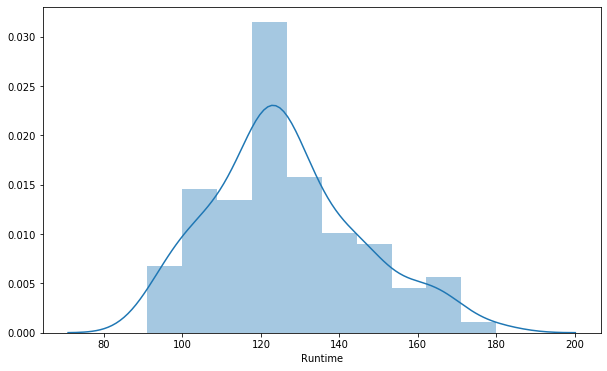

In [21]:
# Runtime histogram/density plot
plt.figure(figsize=(10,6))
sns.distplot(df.Runtime)
plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.6: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [22]:
# Write your code here

r_rated = df[df['content_rating']=='R']
popular_R = r_rated.sort_values(by = 'CVotesU18M', ascending=False).head(10)
popular_R

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Average_rating,popular_trio,pt
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.3,8.1,7.9,R,USA,305,7.25,17166.0,17166.0
36,The Wolf of Wall Street,2013,100,116,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.5,7.8,8.1,8.1,R,USA,16,7.85,44000.0,44000.0
35,Django Unchained,2012,100,162,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.1,7.8,8.4,8.4,R,USA,62,8.25,40265.0,40265.0
29,Mad Max: Fury Road,2015,150,153,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.2,8.0,8.2,8.0,R,Australia,3,8.55,36943.0,36943.0
95,Whiplash,2014,3,13,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.2,8.0,8.6,8.4,R,USA,10,8.65,25505.0,25505.0
31,The Revenant,2015,135,183,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.6,8.1,7.9,R,USA,48,7.80,56733.0,56733.0
40,Shutter Island,2010,80,127,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.6,7.6,7.8,8.1,R,USA,47,7.20,29386.0,29386.0
43,Gone Girl,2014,61,167,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.6,8.1,8.1,R,USA,106,8.00,2272.0,2272.0
72,Birdman or (The Unexpected Virtue of Ignorance),2014,18,42,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,7.0,7.1,7.9,7.7,R,USA,24,8.30,21529.0,21529.0
65,The Grand Budapest Hotel,2014,25,59,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.9,7.7,8.1,8.0,R,USA,34,8.45,14670.0,14670.0


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [23]:
# Create the dataframe df_by_genre

df_by_genre = df[df.columns[df.columns.str.startswith('CV')]|df.columns[df.columns.str.startswith('ge')]|df.columns[df.columns.str.startswith('V')]]
df_by_genre.head(3)

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,genre_1,genre_2,genre_3
94,5086,2248,3071,4906,10431,23789,52238,76838,62055,49673,...,7.7,8.0,8.1,8.0,8.1,8.0,7.9,Drama,NaN,NaN
69,4739,1785,2420,4021,9603,27231,83070,161460,126223,75556,...,8.1,8.1,8.4,8.5,8.4,8.3,8.0,Biography,Drama,History
18,3450,1123,1872,3349,8542,24210,67153,119801,113244,87509,...,8.2,8.2,8.4,8.3,8.4,8.2,8.1,Animation,Adventure,Comedy


In [24]:
# Create a column cnt and initialize it to 1

df_by_genre['cnt'] = 1
df_by_genre.head()

C:\Users\AnKiT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,genre_1,genre_2,genre_3,cnt
94,5086,2248,3071,4906,10431,23789,52238,76838,62055,49673,...,8.0,8.1,8.0,8.1,8.0,7.9,Drama,NaN,NaN,1
69,4739,1785,2420,4021,9603,27231,83070,161460,126223,75556,...,8.1,8.4,8.5,8.4,8.3,8.0,Biography,Drama,History,1
18,3450,1123,1872,3349,8542,24210,67153,119801,113244,87509,...,8.2,8.4,8.3,8.4,8.2,8.1,Animation,Adventure,Comedy,1
0,6802,2407,2839,3998,8044,17377,38831,64640,71191,74245,...,8.2,8.9,8.7,9.0,8.3,8.1,Comedy,Drama,Music,1
4,1834,888,1233,1976,4539,11879,29626,46596,33532,18191,...,7.9,8.5,8.1,8.5,7.9,7.8,Drama,NaN,NaN,1


In [25]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby('genre_1').sum()
df_by_g2 = df_by_genre.groupby('genre_2').sum()
df_by_g3 = df_by_genre.groupby('genre_3').sum()

In [26]:
# Add the grouped data frames and store it in a new data frame

group_df = df_by_g1.add(df_by_g2, fill_value=0)
#group_df
new_df = group_df.add(df_by_g3, fill_value=0)
#new_df

In [27]:
# Extract genres with atleast 10 occurences

new_df['cnt'].sort_values(ascending=False).head(10)

Drama        65.0
Adventure    38.0
Action       31.0
Comedy       23.0
Biography    18.0
Sci-Fi       17.0
Thriller     13.0
Romance      13.0
Animation    11.0
Crime        11.0
Name: cnt, dtype: float64

In [28]:
# Extract genres with atleast 10 occurences
top_10_genre = new_df[new_df['cnt']>10]
top_10_genre

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
Action,171247.0,65573.0,95004.0,166970.0,393484.0,1075354.0,2922126.0,4677755.0,3547429.0,3166467.0,...,240.4,236.4,245.6,243.2,253.8,256.8,252.8,247.6,240.6,31.0
Adventure,173858.0,69737.0,103318.0,183070.0,438970.0,1212075.0,3281981.0,5262328.0,4014192.0,3594659.0,...,298.0,290.4,304.5,298.4,311.4,314.9,309.3,303.5,296.2,38.0
Animation,25193.0,10026.0,15733.0,30718.0,83069.0,251076.0,722782.0,1153214.0,798227.0,681562.0,...,86.7,84.1,89.3,86.4,88.9,90.7,87.7,87.6,86.1,11.0
Biography,51297.0,20613.0,29510.0,53718.0,138648.0,425595.0,1332980.0,2231078.0,1401608.0,852003.0,...,141.7,137.9,141.8,141.1,146.9,146.9,146.6,142.7,139.9,18.0
Comedy,88367.0,39391.0,56218.0,97469.0,226852.0,600287.0,1591069.0,2506851.0,1774987.0,1383616.0,...,177.1,174.7,181.2,180.2,187.4,186.9,186.9,182.6,178.9,23.0
Crime,37217.0,16985.0,24713.0,42271.0,98690.0,278391.0,821390.0,1419495.0,967118.0,574526.0,...,84.5,83.8,84.9,86.6,90.6,87.7,90.9,87.8,85.8,11.0
Drama,211308.0,94185.0,135126.0,235475.0,552312.0,1529356.0,4319700.0,7107053.0,4935375.0,3404438.0,...,503.2,495.3,510.3,509.8,533.6,529.7,532.2,515.9,506.0,65.0
Romance,40075.0,19200.0,27698.0,48913.0,110901.0,281289.0,712841.0,1069280.0,689492.0,549959.0,...,98.9,97.5,101.8,100.7,105.8,106.1,104.8,101.8,100.1,13.0
Sci-Fi,114435.0,46171.0,65904.0,111925.0,254175.0,671811.0,1802098.0,3002994.0,2530855.0,2325284.0,...,131.5,130.8,135.3,135.4,140.9,141.6,141.0,137.5,134.0,17.0
Thriller,57630.0,25767.0,37940.0,65281.0,149953.0,416046.0,1175799.0,1993378.0,1465491.0,1081701.0,...,100.7,99.3,101.6,102.3,106.7,104.9,106.7,103.1,101.5,13.0


In [29]:
# Take the mean for every column by dividing with cnt 

count = list(top_10_genre.cnt)
top_10_genre = top_10_genre.div(top_10_genre.cnt, axis='index')
top_10_genre.drop('cnt', inplace=True, axis=1)
top_10_genre

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45A,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS
Action,5524.096774,2115.258065,3064.645161,5386.129032,12693.032258,34688.838710,94262.129032,150895.322581,114433.193548,102144.096774,...,7.645161,7.754839,7.625806,7.922581,7.845161,8.187097,8.283871,8.154839,7.987097,7.761290
Adventure,4575.210526,1835.184211,2718.894737,4817.631579,11551.842105,31896.710526,86367.921053,138482.315789,105636.631579,94596.289474,...,7.676316,7.842105,7.642105,8.013158,7.852632,8.194737,8.286842,8.139474,7.986842,7.794737
Animation,2290.272727,911.454545,1430.272727,2792.545455,7551.727273,22825.090909,65707.454545,104837.636364,72566.090909,61960.181818,...,7.681818,7.881818,7.645455,8.118182,7.854545,8.081818,8.245455,7.972727,7.963636,7.827273
Biography,2849.833333,1145.166667,1639.444444,2984.333333,7702.666667,23644.166667,74054.444444,123948.777778,77867.111111,47333.500000,...,7.694444,7.872222,7.661111,7.877778,7.838889,8.161111,8.161111,8.144444,7.927778,7.772222
Comedy,3842.043478,1712.652174,2444.260870,4237.782609,9863.130435,26099.434783,69176.913043,108993.521739,77173.347826,60157.217391,...,7.608696,7.700000,7.595652,7.878261,7.834783,8.147826,8.126087,8.126087,7.939130,7.778261
Crime,3383.363636,1544.090909,2246.636364,3842.818182,8971.818182,25308.272727,74671.818182,129045.000000,87919.818182,52229.636364,...,7.627273,7.681818,7.618182,7.718182,7.872727,8.236364,7.972727,8.263636,7.981818,7.800000
Drama,3250.892308,1449.000000,2078.861538,3622.692308,8497.107692,23528.553846,66456.923077,109339.276923,75928.846154,52375.969231,...,7.643077,7.741538,7.620000,7.850769,7.843077,8.209231,8.149231,8.187692,7.936923,7.784615
Romance,3082.692308,1476.923077,2130.615385,3762.538462,8530.846154,21637.615385,54833.923077,82252.307692,53037.846154,42304.538462,...,7.523077,7.607692,7.500000,7.830769,7.746154,8.138462,8.161538,8.061538,7.830769,7.700000
Sci-Fi,6731.470588,2715.941176,3876.705882,6583.823529,14951.470588,39518.294118,106005.764706,176646.705882,148873.823529,136781.411765,...,7.711765,7.735294,7.694118,7.958824,7.964706,8.288235,8.329412,8.294118,8.088235,7.882353
Thriller,4433.076923,1982.076923,2918.461538,5021.615385,11534.846154,32003.538462,90446.076923,153336.769231,112730.076923,83207.769231,...,7.661538,7.746154,7.638462,7.815385,7.869231,8.207692,8.069231,8.207692,7.930769,7.807692


In [30]:
# Rounding off the columns of Votes to two decimals

top_10_genre = top_10_genre.apply(lambda x: round(x,2), axis=0)
top_10_genre

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45A,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS
Action,5524.10,2115.26,3064.65,5386.13,12693.03,34688.84,94262.13,150895.32,114433.19,102144.10,...,7.65,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76
Adventure,4575.21,1835.18,2718.89,4817.63,11551.84,31896.71,86367.92,138482.32,105636.63,94596.29,...,7.68,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79
Animation,2290.27,911.45,1430.27,2792.55,7551.73,22825.09,65707.45,104837.64,72566.09,61960.18,...,7.68,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83
Biography,2849.83,1145.17,1639.44,2984.33,7702.67,23644.17,74054.44,123948.78,77867.11,47333.50,...,7.69,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77
Comedy,3842.04,1712.65,2444.26,4237.78,9863.13,26099.43,69176.91,108993.52,77173.35,60157.22,...,7.61,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78
Crime,3383.36,1544.09,2246.64,3842.82,8971.82,25308.27,74671.82,129045.00,87919.82,52229.64,...,7.63,7.68,7.62,7.72,7.87,8.24,7.97,8.26,7.98,7.80
Drama,3250.89,1449.00,2078.86,3622.69,8497.11,23528.55,66456.92,109339.28,75928.85,52375.97,...,7.64,7.74,7.62,7.85,7.84,8.21,8.15,8.19,7.94,7.78
Romance,3082.69,1476.92,2130.62,3762.54,8530.85,21637.62,54833.92,82252.31,53037.85,42304.54,...,7.52,7.61,7.50,7.83,7.75,8.14,8.16,8.06,7.83,7.70
Sci-Fi,6731.47,2715.94,3876.71,6583.82,14951.47,39518.29,106005.76,176646.71,148873.82,136781.41,...,7.71,7.74,7.69,7.96,7.96,8.29,8.33,8.29,8.09,7.88
Thriller,4433.08,1982.08,2918.46,5021.62,11534.85,32003.54,90446.08,153336.77,112730.08,83207.77,...,7.66,7.75,7.64,7.82,7.87,8.21,8.07,8.21,7.93,7.81


In [31]:
# Converting CVotes to int type

top_10_genre[top_10_genre.columns[top_10_genre.columns.str.startswith('CV')]] = top_10_genre[top_10_genre.columns[top_10_genre.columns.str.startswith('CV')]].astype('int')
top_10_genre.head()


,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45A,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS
Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,102144,...,7.65,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76
Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,94596,...,7.68,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79
Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,61960,...,7.68,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83
Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,47333,...,7.69,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77
Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,60157,...,7.61,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

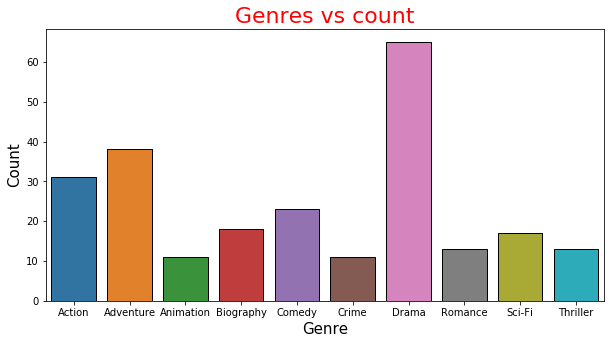

In [32]:
# Countplot for genres

cnt=count
top_10_genre['cnt']=cnt
plt.figure(figsize=[10,5])
sns.barplot(x=top_10_genre.index,y=top_10_genre.cnt,edgecolor='black')
plt.title('Genres vs count',fontsize=22,color='red')
plt.xlabel('Genre',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')
plt.show()

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

C:\Users\AnKiT\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\AnKiT\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\AnKiT\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\AnKiT\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


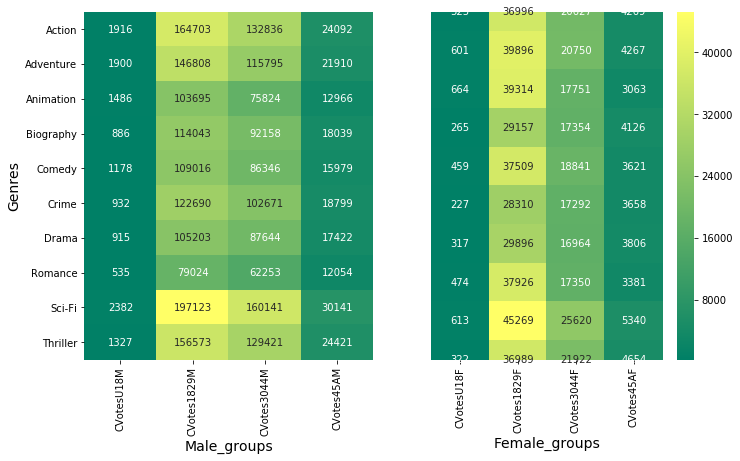

In [33]:
# 1st set of heat maps for CVotes-related columns

male_group=top_10_genre.groupby(top_10_genre.index)['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM'].mean()
female_group=top_10_genre.groupby(top_10_genre.index)['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF'].mean()

fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(11.4,6.4)
ax1.get_shared_y_axes().join(ax1,ax2)
h1=sns.heatmap(male_group,annot=True,cmap='summer',fmt='d',cbar=False,ax=ax1)
h1.set_xlabel('Male_groups',fontsize=14)
h1.set_ylabel('Genres',fontsize=14)

h2=sns.heatmap(female_group,annot=True,cmap='summer',fmt='d',ax=ax2)
h2.set_xlabel('Female_groups',fontsize=14)

t1=ax1.get_xticklabels()
ax1.set_xticklabels(t1, rotation=90)

h2.set_yticks([])
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:

    Inference 1:Drama stands top in count (above bar graph) but Sci-Fi got most votes irrespective of their gender.
    Inference 2:Romance got least votes from males among all age groups where as Crime got least votes from females which seems females are not intrested in crime genre.
    Inference 3:Age groups 18-28 and 30-44 are having more number of votes than other age groups.

C:\Users\AnKiT\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\AnKiT\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\AnKiT\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\AnKiT\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


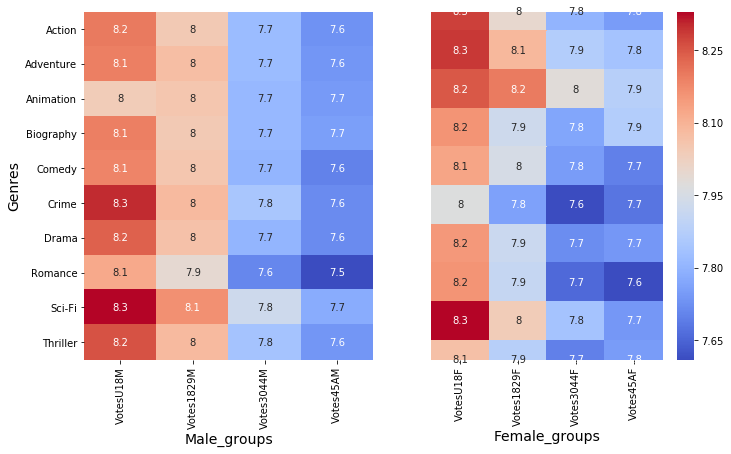

In [34]:
# 2nd set of heat maps for Votes-related columns

male_group=top_10_genre.groupby(top_10_genre.index)['VotesU18M','Votes1829M','Votes3044M','Votes45AM'].mean()
female_group=top_10_genre.groupby(top_10_genre.index)['VotesU18F','Votes1829F','Votes3044F','Votes45AF'].mean()

fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(11.4,6.4)
ax1.get_shared_y_axes().join(ax1,ax2)
h1=sns.heatmap(male_group,annot=True,cmap='coolwarm',cbar=False,ax=ax1)
h1.set_xlabel('Male_groups',fontsize=14)
h1.set_ylabel('Genres',fontsize=14)

h2=sns.heatmap(female_group,annot=True,cmap='coolwarm',ax=ax2)
h2.set_xlabel('Female_groups',fontsize=14)
h2.set_ylabel('')
h2.set_yticks([])

t1=ax1.get_xticklabels()
ax1.set_xticklabels(t1, rotation=90)

plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:

    Inference 1:Romance is the least rated genre in the age group of 45A for both males and females, But it got higher average for females than males.
    Inference 2:Crime and Thriller are next genres in top 3 for males, Action and Adventure for females.
    Inference 3:It seems like all the age groups in females are more likely to watch Animation than males.

###  Subtask 3.4:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [35]:
# Sorting by CVotes1000

cv_sort = top_10_genre.sort_values(by='CVotes1000', ascending=False)
cv_sort

,CVotes01,CVotes02,CVotes03,CVotes04,CVotes05,CVotes06,CVotes07,CVotes08,CVotes09,CVotes10,...,Votes45AF,Votes45AM,VotesF,VotesM,VotesU18,VotesU18F,VotesU18M,VotesUS,VotesnUS,cnt
Sci-Fi,6731,2715,3876,6583,14951,39518,106005,176646,148873,136781,...,7.74,7.69,7.96,7.96,8.29,8.33,8.29,8.09,7.88,17.0
Action,5524,2115,3064,5386,12693,34688,94262,150895,114433,102144,...,7.75,7.63,7.92,7.85,8.19,8.28,8.15,7.99,7.76,31.0
Thriller,4433,1982,2918,5021,11534,32003,90446,153336,112730,83207,...,7.75,7.64,7.82,7.87,8.21,8.07,8.21,7.93,7.81,13.0
Adventure,4575,1835,2718,4817,11551,31896,86367,138482,105636,94596,...,7.84,7.64,8.01,7.85,8.19,8.29,8.14,7.99,7.79,38.0
Crime,3383,1544,2246,3842,8971,25308,74671,129045,87919,52229,...,7.68,7.62,7.72,7.87,8.24,7.97,8.26,7.98,7.80,11.0
Comedy,3842,1712,2444,4237,9863,26099,69176,108993,77173,60157,...,7.70,7.60,7.88,7.83,8.15,8.13,8.13,7.94,7.78,23.0
Biography,2849,1145,1639,2984,7702,23644,74054,123948,77867,47333,...,7.87,7.66,7.88,7.84,8.16,8.16,8.14,7.93,7.77,18.0
Drama,3250,1449,2078,3622,8497,23528,66456,109339,75928,52375,...,7.74,7.62,7.85,7.84,8.21,8.15,8.19,7.94,7.78,65.0
Animation,2290,911,1430,2792,7551,22825,65707,104837,72566,61960,...,7.88,7.65,8.12,7.85,8.08,8.25,7.97,7.96,7.83,11.0
Romance,3082,1476,2130,3762,8530,21637,54833,82252,53037,42304,...,7.61,7.50,7.83,7.75,8.14,8.16,8.06,7.83,7.70,13.0


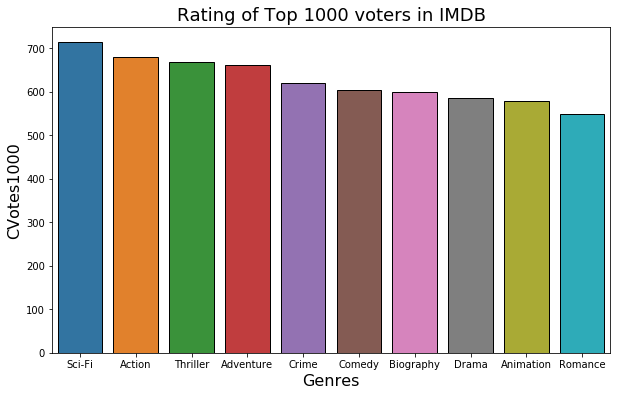

In [36]:
# Bar plot

plt.figure(figsize=[10,6])
sns.barplot(data=cv_sort,x=cv_sort.index,y='CVotes1000',edgecolor='black')
plt.title('Rating of Top 1000 voters in IMDB',fontsize=18,color='Black')
plt.xlabel('Genres',fontsize=16)
plt.ylabel('CVotes1000',fontsize=16)
plt.show()

**`Inferences:`** Write your inferences/observations here.

1.Sci-Fi is most popular genre among Top 1000 voters also(It is popular in abover graphs).

2.Romance is least popular genre followed by Animation.

3.It appers that Thriller and Adventure do not have significant difference in the populatity among Top 1000voters.

4.Even Sci-Fi genre having less number of movies but it is the most popular.

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.